In [2]:
import pandas as pd
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *

#from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 数据处理

In [38]:
file="E:/data/bi/data4.csv"
all_df=pd.read_csv(file,sep=',')

for i in range(len(all_df["marker"].values)): 
    if(all_df["marker"].values[i] =='Natural'): 
        all_df["marker"].values[i] =0
    else:
        all_df["marker"].values[i] =1
print(all_df["marker"])

#删除空值和inf所在行
all_df=all_df[~all_df.isin([np.nan, np.inf, -np.inf]).any(1)]
#保存数据
all_df.to_csv("E:/data/bi/data4.csv",index=0)
#all_df=all_df.iloc[:,1:130]

0       0
1       0
2       0
3       0
4       0
       ..
5197    0
5198    0
5199    0
5200    0
5201    0
Name: marker, Length: 5202, dtype: object


In [22]:
for i in range(len(all_df["marker"].values)): 
    if(all_df["marker"].values[i] =='Natural'): 
        all_df["marker"].values[i] =0
    else:
        all_df["marker"].values[i] =1
print(all_df["marker"])

0       0
1       0
2       0
3       0
4       0
       ..
5197    0
5198    0
5199    0
5200    0
5201    0
Name: marker, Length: 5202, dtype: object


In [23]:
#删除空值和inf所在行
all_df=all_df[~all_df.isin([np.nan, np.inf, -np.inf]).any(1)]
#保存数据
all_df.to_csv("E:/data/bi/data4.csv",index=0)
#all_df=all_df.iloc[:,1:130]

In [24]:
all_df3=pd.read_csv("E:/data/bi/data4.csv")

In [20]:
all_df3

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0,0,0,0,0,0,0,0,0,0
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982442,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0,0,0,0,0,0,0,0,0,0
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0,0,0,0,0,0,0,0,0,0
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0,0,0,0,0,0,0,0,0,0
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4966,132.702755,131308.7150,12.725393,131283.6417,-107.274888,131383.9348,137.051505,322.09049,17.194463,322.45671,...,0,0,0,0,0,0,0,0,0,0
4967,131.980828,131835.2537,11.992007,131835.2537,-107.979626,131935.5467,132.061042,337.47173,11.946170,338.38728,...,0,0,0,0,0,0,0,0,0,0
4968,131.780293,131885.4002,11.802931,131860.3269,-108.191620,131960.6200,131.379222,338.75350,11.258621,339.85216,...,0,0,0,0,0,0,0,0,0,0
4969,131.757375,131885.4002,11.762824,131860.3269,-108.214539,131985.6933,131.270360,339.11972,11.241432,340.03527,...,0,0,0,0,0,0,0,0,0,0


# 用处理后的数据进行CNN

In [3]:
#all_df = pd.read_csv("E:/data/pca_data_5.csv",names=["0","1","2","3","4","5"])
all_df=pd.read_csv("E:/data/bi/data1.csv")
#all_df=pd.read_csv(r"E:\data\14busdata\1w14attack.csv",header=None)
ndarray = all_df.values

In [3]:
ndarray.shape

(4618, 129)

In [4]:
all_df2=pd.read_csv("E:/data/bi/data2.csv")
ndarray2 = all_df2.values

In [6]:
all_df3=pd.read_csv("E:/data/bi/data3.csv")
ndarray3 = all_df3.values

In [20]:
ndarray=np.vstack((ndarray,ndarray2,ndarray3))

In [4]:
ndarray.shape

(4618, 129)

In [5]:
#把特征和标签分开用于归一化
label=ndarray[:,-1].reshape(4618,1)
feature=ndarray[:,:-1]

In [6]:
from sklearn import preprocessing
#数据归一化
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
scalefeature=minmax_scale.fit_transform(feature)

In [7]:
scalefeature.shape

(4618, 128)

In [8]:
#先将数据集进行拼接，要不然我们只针对样本进行采样的话，会找不到对应的标签的
data = np.hstack((scalefeature,label))

In [9]:
#使用随机采样方式划分数据集
train_set,test_set = train_test_split(data,test_size = 0.2,random_state = 42)
n=len(train_set)
m=len(test_set)

In [10]:
#把训练和测试的特征和标签分开
tr_feature=train_set[:,:-1]
tr_label=train_set[:,-1].reshape(n,1)
te_feature=test_set[:,:-1]
te_label=test_set[:,-1].reshape(m,1)

In [11]:
#扩充特征的维度否则会报错
tr_feature=np.expand_dims(tr_feature,axis=2)
te_feature=np.expand_dims(te_feature,axis=2)

In [12]:
tr_feature.shape[1]

128

In [13]:
model = Sequential()
model.add(Conv1D(256, 5, activation='relu', input_shape=(tr_feature.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(3))
#model.add(Conv1D(128, 3, activation='relu'))
model.add(Conv1D(128, 3, activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(50, 3, activation='relu'))
model.add(Dropout(0.1))
model.add(Conv1D(10, 3, activation='relu'))
model.add(Flatten())
model.add(Dense(160, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 124, 256)          1536      
_________________________________________________________________
dropout (Dropout)            (None, 124, 256)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 122, 128)          98432     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 40, 128)           0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 38, 128)           49280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 38, 128)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 36, 50)            1

In [13]:
# model = Sequential()
# model.add(Conv1D(10, 2, activation='relu', input_shape=(tr_feature.shape[1], 1),padding='same'))
#model.add(Dropout(0.05))
#model.add(Conv1D(7, 2, activation='relu',padding='same'))
#model.add(MaxPooling1D(3))
#model.add(Conv1D(128, 3, activation='relu'))
#model.add(Conv1D(128, 3, activation='relu'))
#model.add(Conv1D(100, 3, activation='relu'))
#model.add(Dropout(0.05))
#model.add(Conv1D(3, 2, activation='relu',padding='same'))
#model.add(Dropout(0.05))
#model.add(Conv1D(10, 3, activation='relu'))
#model.add(Flatten())
#model.add(Dense(1, activation='sigmoid'))
#model.summary()

In [47]:
from tensorflow.keras import backend as K

In [48]:
def binary_focal_loss(gamma=2, alpha=0.25):
    """
    Binary form of focal loss.
    适用于二分类问题的focal loss
    
    focal_loss(p_t) = -alpha_t * (1 - p_t)**gamma * log(p_t)
        where p = sigmoid(x), p_t = p or 1 - p depending on if the label is 1 or 0, respectively.
    References:
        https://arxiv.org/pdf/1708.02002.pdf
    Usage:
     model.compile(loss=[binary_focal_loss(alpha=.25, gamma=2)], metrics=["accuracy"], optimizer=adam)
    """
    alpha = tf.constant(alpha, dtype=tf.float32)
    gamma = tf.constant(gamma, dtype=tf.float32)

    def binary_focal_loss_fixed(y_true, y_pred):
        """
        y_true shape need be (None,1)
        y_pred need be compute after sigmoid
        """
        y_true = tf.cast(y_true, tf.float32)
        alpha_t = y_true*alpha + (K.ones_like(y_true)-y_true)*(1-alpha)
    
        p_t = y_true*y_pred + (K.ones_like(y_true)-y_true)*(K.ones_like(y_true)-y_pred) + K.epsilon()
        focal_loss = - alpha_t * K.pow((K.ones_like(y_true)-p_t),gamma) * K.log(p_t)
        return K.mean(focal_loss)
    return binary_focal_loss_fixed


In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [15]:
reduceLr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, verbose=0, mode='auto', cooldown=0, min_lr=0.01)

train_history=model.fit(x=tr_feature, 
                        y=tr_label,
                        validation_split=0.1,
                        epochs=20,
                        batch_size=20,
                        callbacks=[reduceLr])


Train on 3324 samples, validate on 370 samples
Epoch 1/20
3324/3324 [==============================] - 11s 3ms/sample - loss: 0.5198 - accuracy: 0.7831 - val_loss: 0.4848 - val_accuracy: 0.7784
Epoch 2/20
3324/3324 [==============================] - 8s 3ms/sample - loss: 0.4650 - accuracy: 0.7771 - val_loss: 0.4878 - val_accuracy: 0.7784
Epoch 3/20
3324/3324 [==============================] - 9s 3ms/sample - loss: 0.4478 - accuracy: 0.7828 - val_loss: 0.4477 - val_accuracy: 0.7784
Epoch 4/20
3324/3324 [==============================] - 8s 3ms/sample - loss: 0.4532 - accuracy: 0.7807 - val_loss: 0.4548 - val_accuracy: 0.7784
Epoch 5/20
3324/3324 [==============================] - 8s 3ms/sample - loss: 0.4395 - accuracy: 0.7798 - val_loss: 0.4431 - val_accuracy: 0.7784
Epoch 6/20
3324/3324 [==============================] - 9s 3ms/sample - loss: 0.4342 - accuracy: 0.7813 - val_loss: 0.4577 - val_accuracy: 0.7811
Epoch 7/20
3324/3324 [==============================] - 8s 2ms/sample - loss

In [18]:
middle = model(inputs=model.input,outputs=model.get_layer('dense').output)
result = middle.predict(x_test)[0]
print(result.shape)


TypeError: call() got an unexpected keyword argument 'outputs'

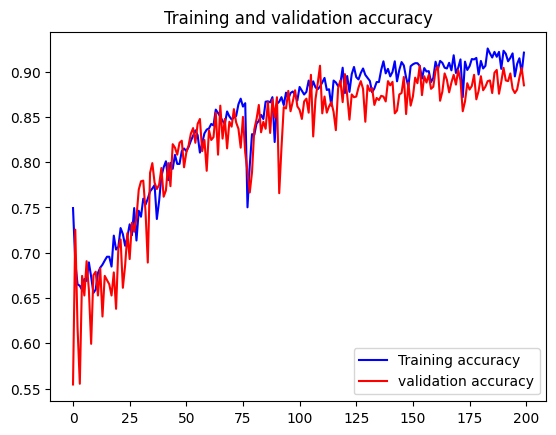

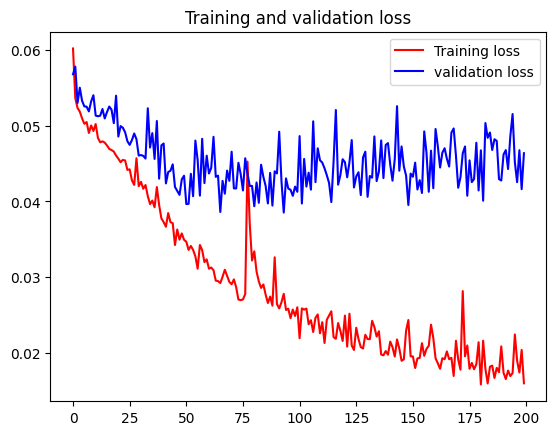

In [16]:
import matplotlib.pyplot as plt 
acc = train_history.history['accuracy']
val_acc = train_history.history['val_accuracy']
loss = train_history.history['loss']
val_loss = train_history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()



In [23]:
score = model.evaluate(te_feature, te_label, batch_size=30)
# pred_y=model.predict(te_feature, batch_size=100)


924/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [29]:
# pred_y=model.predict(te_feature, batch_size=100)
# print(pred_y)